In [13]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was 

In [8]:
df = pd.read_excel("Case_Dataset.xlsx")

In [10]:
df.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [11]:
df.shape

(241, 19)

In [14]:
df.describe()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,34.261411,47.240664,64.439834,67.817427,70.502075,72.365145,74.946058,78.041494,82.336100,86.000000,89.269710,92.091286,94.688797,97.373444,101.165975,110.008299,116.381743
std,9.387610,11.321079,13.495891,14.200934,14.873109,14.970786,15.096674,15.054842,15.594841,16.089075,16.911962,17.370472,17.468264,17.589816,17.547004,17.785057,17.629388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,28.000000,41.000000,58.000000,62.000000,64.000000,66.000000,68.000000,71.000000,76.000000,80.000000,82.000000,84.000000,88.000000,91.000000,95.000000,102.000000,110.000000
50%,35.000000,48.000000,65.000000,69.000000,72.000000,74.000000,77.000000,79.000000,85.000000,87.000000,91.000000,94.000000,97.000000,100.000000,103.000000,112.000000,117.000000
75%,40.000000,55.000000,73.000000,76.000000,80.000000,82.000000,84.000000,86.000000,92.000000,95.000000,99.000000,103.000000,106.000000,107.000000,111.000000,119.000000,126.000000
max,57.000000,73.000000,93.000000,99.000000,102.000000,106.000000,106.000000,112.000000,113.000000,118.000000,121.000000,121.000000,124.000000,127.000000,131.000000,139.000000,145.000000


In [15]:
df.corr()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
T - 28,1.000000,0.894700,0.766981,0.761258,0.764272,0.769680,0.744281,0.718607,0.697891,0.669865,0.669421,0.679711,0.685468,0.686128,0.655022,0.629432,0.608290
T - 21,0.894700,1.000000,0.871427,0.862506,0.849120,0.839669,0.821875,0.807351,0.794639,0.769279,0.771311,0.766765,0.766230,0.763745,0.742956,0.718364,0.702459
T - 14,0.766981,0.871427,1.000000,0.975593,0.940374,0.918844,0.913420,0.924774,0.919929,0.900452,0.890108,0.863536,0.846024,0.845696,0.848112,0.821478,0.800877
T - 13,0.761258,0.862506,0.975593,1.000000,0.977337,0.955026,0.941554,0.940412,0.931122,0.914450,0.911955,0.895554,0.878267,0.870565,0.862705,0.835040,0.812730
T - 12,0.764272,0.849120,0.940374,0.977337,1.000000,0.986618,0.962074,0.941533,0.922158,0.904064,0.912807,0.919413,0.910958,0.893899,0.876955,0.847387,0.818714
T - 11,0.769680,0.839669,0.918844,0.955026,0.986618,1.000000,0.979289,0.947764,0.918142,0.896470,0.906488,0.920257,0.923938,0.908863,0.885674,0.851878,0.819855
T - 10,0.744281,0.821875,0.913420,0.941554,0.962074,0.979289,1.000000,0.973322,0.935192,0.912204,0.918598,0.922247,0.927982,0.926197,0.907966,0.871200,0.842193
T - 9,0.718607,0.807351,0.924774,0.940412,0.941533,0.947764,0.973322,1.000000,0.971532,0.955061,0.945678,0.933364,0.925826,0.924528,0.922874,0.895139,0.872890
T - 8,0.697891,0.794639,0.919929,0.931122,0.922158,0.918142,0.935192,0.971532,1.000000,0.984829,0.969236,0.948335,0.930065,0.920350,0.927708,0.909233,0.887675
T - 7,0.669865,0.769279,0.900452,0.914450,0.904064,0.896470,0.912204,0.955061,0.984829,1.000000,0.984542,0.960000,0.938392,0.925503,0.934284,0.918124,0.895779


In [ ]:
# Corr(T-1,Actual)=0.964 
# Corr(T-3,Actual)=0.913
# Corr(T-7,Actual)=0.896
# Corr(T-14,Actual)=0.801
# Corr(T-21,Actual)=0.702
# Corr(T-28,Actual)=0.608

# Average number of surgery cases increases  as we move closer to actual day
# As the gap from surgery day increase, the correlation decreases
# From the correlation matrix, almost all the correlations are significantly high.

In [ ]:
# Average of actual surgery is 116 with standard deviation of 17.63

In [16]:
# Validating for T - 1
df.groupby('DOW')['T - 1'].mean(), df.groupby('DOW')['T - 1'].std()


(DOW
 Fri     97.428571
 Mon    110.787234
 Thu    117.583333
 Tue    114.020408
 Wed    110.416667
 Name: T - 1, dtype: float64, DOW
 Fri    25.922159
 Mon    18.863279
 Thu    10.394011
 Tue    10.296621
 Wed    11.100764
 Name: T - 1, dtype: float64)

In [17]:
df['DOW'].value_counts()

Tue    49
Fri    49
Wed    48
Thu    48
Mon    47
Name: DOW, dtype: int64

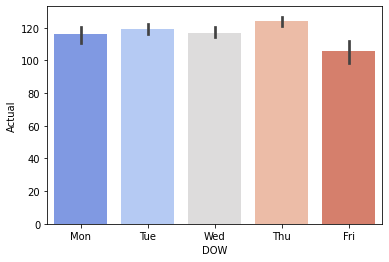

In [18]:
# Trend of Number of Surgeries performed by Day of Week
df2 = df[['DOW', 'Actual']]
ax = sns.barplot(x='DOW',y='Actual', data=df, palette='coolwarm')

<AxesSubplot:xlabel='DOW', ylabel='Actual'>

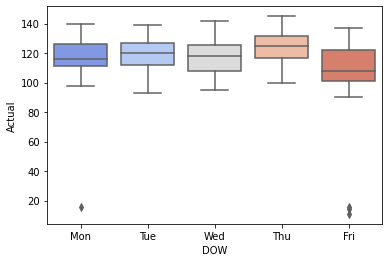

In [19]:
sns.boxplot(x='DOW',y='Actual', data=df, palette='coolwarm')

In [ ]:
# Fridays have lowest number of surgeries which may be indicate surgeon preferences
# Thursdays have lowest number of surgeries
# Alternatively, the high number of surgeries on Thursday might be due to add-on cases 

In [20]:
test=df.loc[1:242, 'T - 28':'T - 1']